In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle('../data/PI_data_for_linefill_all.pkl')

In [3]:
def get_HRDSY_painted_properties(path_to_PI_data):
    # Read data
    df = pd.read_pickle(path_to_PI_data)
    df.index = df.index.tz_convert('MST').tz_localize(None)
    df = df.bfill()
    
    # Get density
    pi_tag_list = [
        'HRDSY-A0-Q',
        'HRDSY-A0-DEN',
        'HRDSY-A0-TS',
        'HRDSY-A0-DRA-Q',
        'HRDST-A0-TM-MOV2469',
        'HRDST-A0-DM-MOV5110',
        'HRDST-A0-TM-MOV2461',
        'HRDST-A0-DM-MOV5111',
        'HRDST-A0-DM-MOV5112',
        'HRDST-A0-TM-MOV2462',
        'HRDST-A0-TM-MOV2005',
        'HRDST-A0-DM-MOV5120',
        'HRDST-A0-DM-MOV5121',
        'HRDST-A0-DM-MOV5122',
        'HRDST-A0-DM-MOV5130',
        'HRDST-A0-TM-MOV2461',
        'HRDST-A0-DM-MOV5131',
        'HRDST-A0-DM-MOV5132',
        'HRDST-A0-TM-MOV2460',
        'HRDST-A0-MB1-Q',
        'HRDST-A0-MB2-Q',
        'HRDST-A0-MB3-Q',
        'HRDST-A0-QMU1-DEN',
        'HRDST-A0-QMU2-DEN',
        'HRDST-A0-QMU3-DEN',
        'HRDST-A0-QMU1-VISCLN',
        'HRDST-A0-QMU2-VISCLN',
        'HRDST-A0-QMU3-VISCLN',
        'HRDST-A0-MB1-TS',
        'HRDST-A0-MB2-TS',
        'HRDST-A0-MB3-TS',]

    tag_not_found_list = []
    for tag in pi_tag_list:
        if tag not in df.columns:
            tag_not_found_list.append(tag)
        else:
            pass
    if tag_not_found_list != []:
        raise ValueError('These tags are not found in the data set:\n' + '\n'.join(tag_not_found_list))
    else:
        pass

    df_result = pd.DataFrame(df.loc[:,['HRDSY-A0-Q','HRDSY-A0-TS', 'HRDSY-A0-DEN']])
    df_result = df_result.rename(columns={'HRDSY-A0-Q':'Q', 'HRDSY-A0-TS': 'Ts', 'HRDSY-A0-DEN':'rho'})
    df_result['DRA_ppm'] = df['HRDSY-A0-DRA-Q'] / df['HRDSY-A0-Q'] * 1000
    df_result['MB1_openpath'] = df['HRDSY-A0-Q'] * 0
    open_status = 1
    idx = df[(df['HRDST-A0-TM-MOV2469']==open_status) & 
             ((df['HRDST-A0-DM-MOV5110']==open_status) & (df['HRDST-A0-TM-MOV2461']==open_status)) | 
             ((df['HRDST-A0-DM-MOV5111']==open_status) & (df['HRDST-A0-TM-MOV2460']==open_status)) | 
             ((df['HRDST-A0-DM-MOV5112']==open_status) & (df['HRDST-A0-TM-MOV2462']==open_status) & (df['HRDST-A0-TM-MOV2005']==open_status))].index
    if len(idx)>0:
        df_result.loc[idx, 'MB1_openpath'] = 1
    df_result['MB2_openpath'] = df['HRDSY-A0-Q'] * 0
    idx = df[(df['HRDST-A0-TM-MOV2469']==open_status) & 
             ((df['HRDST-A0-DM-MOV5120']==open_status) & (df['HRDST-A0-TM-MOV2461']==open_status)) | 
             ((df['HRDST-A0-DM-MOV5121']==open_status) & (df['HRDST-A0-TM-MOV2460']==open_status)) |
             ((df['HRDST-A0-DM-MOV5122']==open_status) & (df['HRDST-A0-TM-MOV2462']==open_status) & (df['HRDST-A0-TM-MOV2005']==open_status))].index
    if len(idx)>0:
        df_result.loc[idx,'MB2_openpath'] = 1
    df_result['MB3_openpath'] = df['HRDSY-A0-Q'] * 0
    idx = df[(df['HRDST-A0-TM-MOV2469']==open_status) & 
             ((df['HRDST-A0-DM-MOV5130']==open_status) & (df['HRDST-A0-TM-MOV2461']==open_status)) | 
             ((df['HRDST-A0-DM-MOV5131']==open_status) & (df['HRDST-A0-TM-MOV2460']==open_status)) | 
             ((df['HRDST-A0-DM-MOV5132']==open_status) & (df['HRDST-A0-TM-MOV2462']==open_status) & (df['HRDST-A0-TM-MOV2005']==open_status))].index
    if len(idx)>0:
        df_result.loc[idx, 'MB3_openpath'] = 1
    
    df_result['MB1_Q'] = df['HRDSY-A0-Q'] * 0
    df_result.loc[df_result['MB1_openpath']==1, 'MB1_Q'] = df.loc[df_result['MB1_openpath']==1, 'HRDST-A0-MB1-Q']
    df_result['MB2_Q'] = df['HRDSY-A0-Q'] * 0
    df_result.loc[df_result['MB2_openpath']==1, 'MB2_Q'] = df.loc[df_result['MB2_openpath']==1, 'HRDST-A0-MB2-Q']
    df_result['MB3_Q'] = df['HRDSY-A0-Q'] * 0
    df_result.loc[df_result['MB3_openpath']==1, 'MB3_Q'] = df.loc[df_result['MB3_openpath']==1, 'HRDST-A0-MB3-Q']
    
    df_result['TNK_openpath'] = df['HRDSY-A0-Q'] * 0
    idx = df[(df['HRDSY-A0-Q']-df_result['MB1_Q']-df_result['MB2_Q']-df_result['MB3_Q'])>100].index
    if len(idx)>0:
        df_result.loc[idx, 'TNK_openpath'] = 1
    df_result['TNK_Q'] = df['HRDSY-A0-Q'] * 0
    df.loc[df_result['TNK_openpath']==1, 'TNK_Q'] = df_result.loc[df_result['TNK_openpath']==1, 'Q']
    df_result['TNK_VISC'] = df['HRDSY-A0-Q'] * 0
    df_result.loc[df['HRDSY-A0-DEN']>880, 'TNK_VISC'] = 300
    df_result.loc[df['HRDSY-A0-DEN']<=880, 'TNK_VISC'] = 150
    
    df_result['rho_painted']  = (df['HRDST-A0-QMU1-DEN']* df_result['MB1_Q'] + df['HRDST-A0-QMU2-DEN']* df_result['MB2_Q'] + df['HRDST-A0-QMU3-DEN']*       df_result['MB3_Q'] + df_result['rho']*     df_result['TNK_Q']) / (df_result['MB1_Q'] + df_result['MB2_Q'] + df_result['MB3_Q'] + df_result['TNK_Q'])
    df_result['mu_painted']   = (df['HRDST-A0-QMU1-VISCLN']*df_result['MB1_Q'] + df['HRDST-A0-QMU2-VISCLN']*df_result['MB2_Q'] + df['HRDST-A0-QMU3-VISCLN']*df_result['MB3_Q'] + df_result['TNK_VISC']*df_result['TNK_Q']) / (df_result['MB1_Q'] + df_result['MB2_Q'] + df_result['MB3_Q'] + df_result['TNK_Q'])
    df_result['Tref_painted'] = (df['HRDST-A0-MB1-TS']*   df_result['MB1_Q'] + df['HRDST-A0-MB2-TS']*   df_result['MB2_Q'] + df['HRDST-A0-MB3-TS']*         df_result['MB3_Q'] + df_result['Ts']*      df_result['TNK_Q']) / (df_result['MB1_Q'] + df_result['MB2_Q'] + df_result['MB3_Q'] + df_result['TNK_Q']) 

    df_result['mu_filtered']   = df_result['mu_painted'].copy()
    idx_mu_out_of_range = df_result[df_result['mu_painted']>500].index
    df_result.loc[idx_mu_out_of_range, 'mu_filtered'] = ASTM_viscosity(6.72, 2.58, df_result.loc[idx_mu_out_of_range, 'Tref_painted'])
    
    df_result['mu_normalized'] = ASTM_viscosity(ASTM_a(df_result['mu_filtered'], 2.58, df_result['Tref_painted']), 2.58, df_result['Tref_painted'])
    return(df_result)

def ASTM_viscosity(A, B, T):
    return(10**(10**(A - B * np.log10(T+273.15))))
    
def ASTM_a(mu, B, T):
    return(np.log10(np.log10(mu)) + B * np.log10(T+273.15))

In [4]:
df_HRDSY = get_HRDSY_painted_properties('../data/PI_data_for_linefill_all.pkl')

In [5]:
df_HRDSY['ASTM_A'] = np.log10(np.log10(df_HRDSY['mu_painted'])) + 2.58 * np.log10(df_HRDSY['Tref_painted']+273.15)

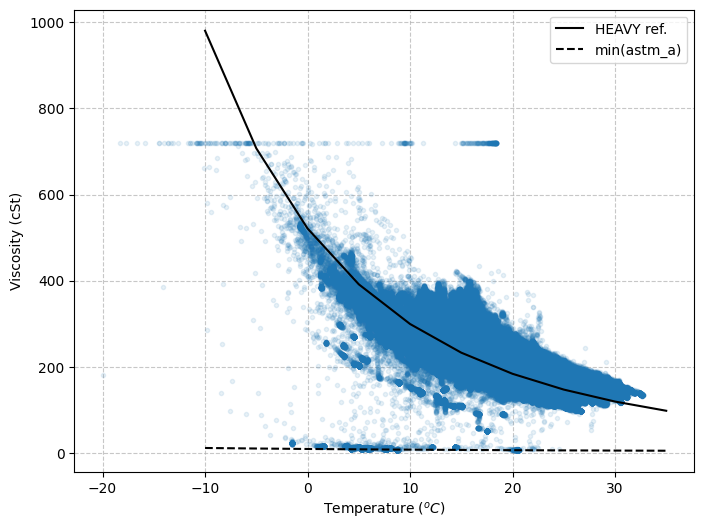

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
idx = df_HRDSY[df_HRDSY['Q']>100].index
x = df_HRDSY.loc[idx, 'Tref_painted'].values
y = df_HRDSY.loc[idx, 'mu_painted'].values
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(x, y, '.', alpha=0.1)  # Create scatter plot

# astm lines
A = 6.72
B = 2.58
x = np.arange(-10, 40, 5)
y = 10**(10**(A - B * np.log10(x+273.15)))
plt.plot(x, y, 'k', label='HEAVY ref.')

# 
A = df_HRDSY['ASTM_A'].min()
B = 2.58
x = np.arange(-10, 40, 5)
y = 10**(10**(A - B * np.log10(x+273.15)))
plt.plot(x, y, 'k--', label='min(astm_a)')
# 
A = df_HRDSY['ASTM_A'].max()
B = 2.58
x = np.arange(-10, 40, 5)
y = 10**(10**(A - B * np.log10(x+273.15)))
#plt.plot(x, y, 'k-.', label='max(astm_a)')
    
# Add labels and title
plt.xlabel('Temperature ($^oC$)')
plt.ylabel('Viscosity (cSt)')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
# Show the plot
plt.show()

In [7]:
df_HRDSY['ASTM_A'] = np.log10(np.log10(df_HRDSY['mu_filtered'])) + 2.58 * np.log10(df_HRDSY['Tref_painted']+273.15)

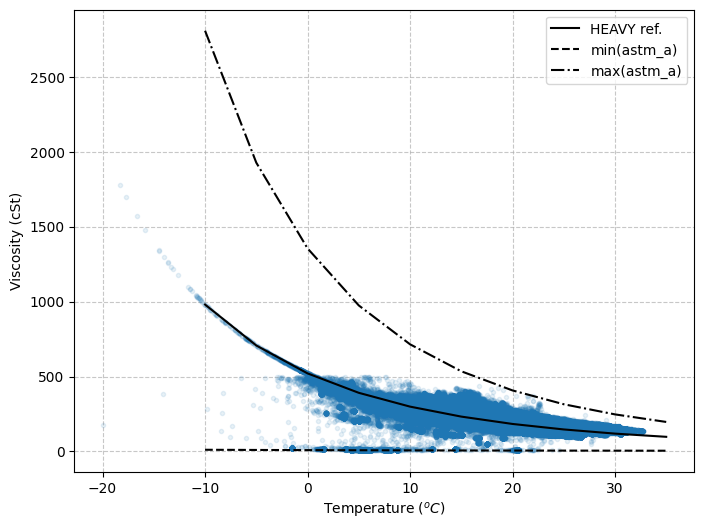

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
idx = df_HRDSY[df_HRDSY['Q']>100].index
x = df_HRDSY.loc[idx, 'Tref_painted'].values
y = df_HRDSY.loc[idx, 'mu_filtered'].values
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(x, y, '.', alpha=0.1)  # Create scatter plot

# astm lines
A = 6.72
B = 2.58
x = np.arange(-10, 40, 5)
y = 10**(10**(A - B * np.log10(x+273.15)))
plt.plot(x, y, 'k', label='HEAVY ref.')

# 
A = df_HRDSY['ASTM_A'].min()
B = 2.58
x = np.arange(-10, 40, 5)
y = 10**(10**(A - B * np.log10(x+273.15)))
plt.plot(x, y, 'k--', label='min(astm_a)')
# 
A = df_HRDSY['ASTM_A'].max()
B = 2.58
x = np.arange(-10, 40, 5)
y = 10**(10**(A - B * np.log10(x+273.15)))
plt.plot(x, y, 'k-.', label='max(astm_a)')
    
# Add labels and title
plt.xlabel('Temperature ($^oC$)')
plt.ylabel('Viscosity (cSt)')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
# Show the plot
plt.show()

In [9]:
idx = df_HRDSY[(df_HRDSY['Q']>100) & (df_HRDSY['Tref_painted']>5) & (df_HRDSY['mu_painted']>720)].index
df_HRDSY.loc[idx, :].to_excel('mu_720_readings.xlsx')

In [10]:
idx = df_HRDSY[(df_HRDSY['Q']>100) & (df_HRDSY['mu_painted']>500)].index
df_HRDSY.loc[idx, :].to_excel('mu_above_500_readings.xlsx')

In [11]:
df_HRDSY.to_pickle('../output/df_HRDSY.pkl')